In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

In [2]:
DFs=pickle.load(open('DFs.pkl', 'rb'))
Summaries=pickle.load(open('Summaries.pkl', 'rb'))
print(len(DFs),len(Summaries))

49 49


In [3]:
myFormat = DateFormatter("%d-%m")
register_matplotlib_converters(myFormat)

# Plot Heart Rates

In [4]:
%matplotlib inline

def plotHeartRate(toPlot, DFs,Summaries):

    nPlots=len(toPlot)
    print('nPlots',nPlots)
    fig, axs = plt.subplots(nrows=nPlots, ncols=1, figsize=(15, 2*nPlots) )

    myFormat = DateFormatter("%H:%M")
    register_matplotlib_converters(myFormat)

    i=0
    for index in toPlot:
        df=DFs[ index ]
        summary=Summaries[ index ]
        axs[i].plot(df['dateTime'], df['BPM'])
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel('BPM')
        axs[i].set_title( summary['string'] )
        axs[i].grid(True)
        axs[i].xaxis.set_major_formatter(myFormat)
        i+=1
        
    fig.tight_layout()
    plt.show()

# end plotHeartRate

nPlots 5


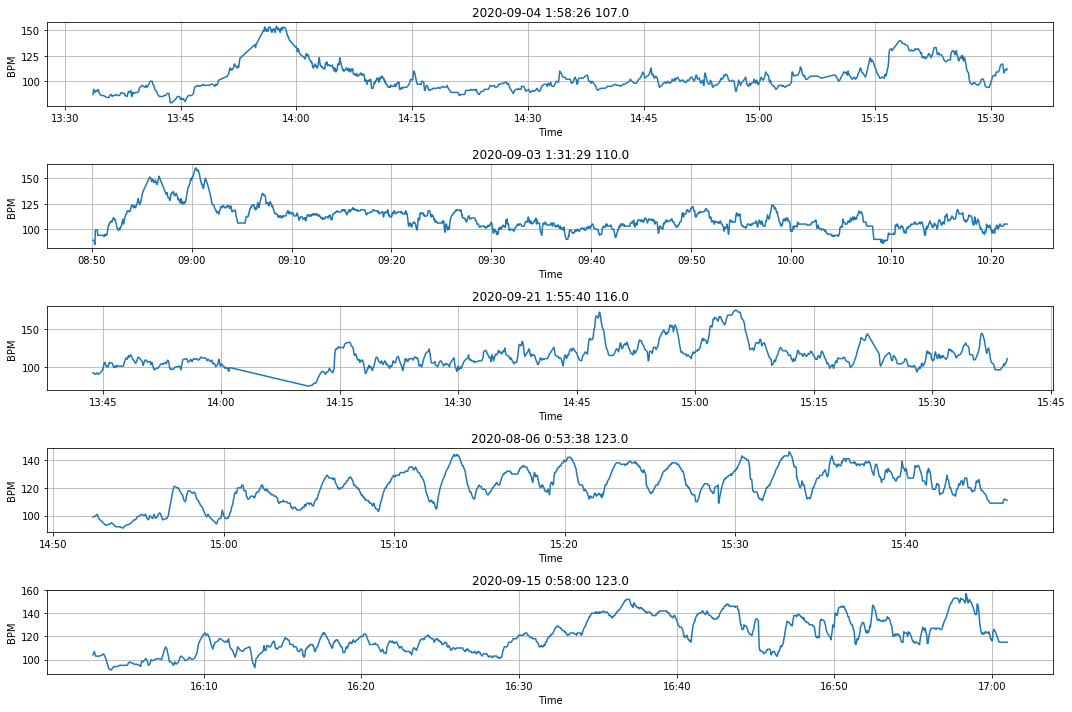

In [5]:
# Plot activities with HIGHEST attribute

# argpartition is used to collect the right indices, see:
#https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array

attribute='peakZone' # 'meanBPM'
nPlots=5

y=[d[attribute] for d in Summaries]
y=np.array(y)
#print(np.sort(y))

toPlot=np.argpartition(y, -nPlots)[-nPlots:]
#print('\n',toPlot,'\n',y[toPlot],'\n',np.sort(y[toPlot]))

plotHeartRate(toPlot,DFs,Summaries)

# FFT

In [6]:
from scipy import fftpack

In [7]:
index=toPlot[0]
print(Summaries[index],len(DFs[index]) )

{'string': '2020-09-04 1:58:26 107.0', 'date': datetime.date(2020, 9, 4), 'meanBPM': 107.0, 'maxBPM': 154, 'duration': datetime.timedelta(seconds=7106), 'peakZone': 92, 'fileName': 'DATA\\heart_rate-2020-09-04.json'} 1219


(-0.05, 0.05)

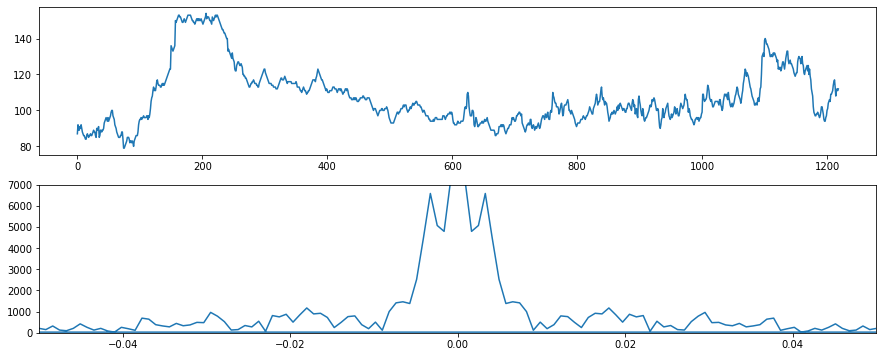

In [8]:
t = np.linspace(0, 1, len(DFs[index]))
df=DFs[index]
x = df['BPM']

X = fftpack.fft(x)

f, (ax0, ax1) = plt.subplots(2, 1, figsize=(15, 6))

ax0.plot(x)


ax1.plot(fftpack.fftfreq(len(t)), np.abs(X))
ax1.set_ylim(0, 7000)
ax1.set_xlim(-0.05, +0.05)

(-0.05, 0.05)

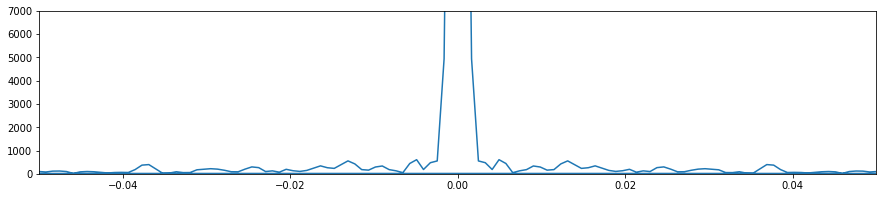

In [9]:
# Kaiser windwoing

win = np.kaiser(len(t), 10)
X_win = fftpack.fft(x * win)

f, ax1 = plt.subplots(1, 1, figsize=(15, 3))

ax1.plot(fftpack.fftfreq(len(t)), np.abs(X_win))
ax1.set_ylim(0, 7000)
ax1.set_xlim(-0.05, +0.05)

In [10]:
index=toPlot[3]
print(Summaries[index],len(DFs[index]) )

{'string': '2020-08-06 0:53:38 123.0', 'date': datetime.date(2020, 8, 6), 'meanBPM': 123.0, 'maxBPM': 146, 'duration': datetime.timedelta(seconds=3218), 'peakZone': 228, 'fileName': 'DATA\\heart_rate-2020-08-06.json'} 1415


(-0.05, 0.05)

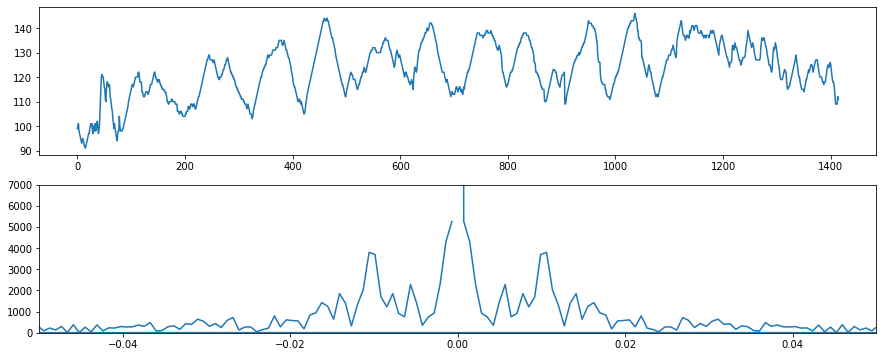

In [11]:
t = np.linspace(0, 1, len(DFs[index]))
df=DFs[index]
x = df['BPM']

X = fftpack.fft(x)

f, (ax0, ax1) = plt.subplots(2, 1, figsize=(15, 6))

ax0.plot(x)


ax1.plot(fftpack.fftfreq(len(t)), np.abs(X))
ax1.set_ylim(0, 7000)
ax1.set_xlim(-0.05, +0.05)

(-0.05, 0.05)

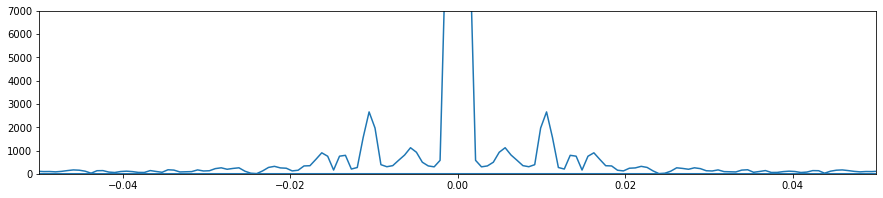

In [12]:
win = np.kaiser(len(t), 10)
X_win = fftpack.fft(x * win)

f, ax1 = plt.subplots(1, 1, figsize=(15, 3))

ax1.plot(fftpack.fftfreq(len(t)), np.abs(X_win))
ax1.set_ylim(0, 7000)
ax1.set_xlim(-0.05, +0.05)

# Original Code

(0, 190)

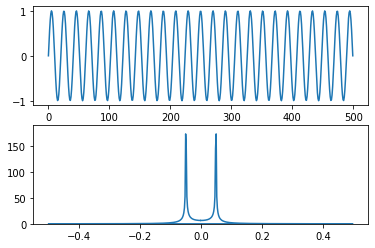

In [13]:
#https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

from scipy import fftpack

t = np.linspace(0, 1, 500)
x = np.sin(49 * np.pi * t)

X = fftpack.fft(x)

f, (ax0, ax1) = plt.subplots(2, 1)

ax0.plot(x)
ax0.set_ylim(-1.1, 1.1)

ax1.plot(fftpack.fftfreq(len(t)), np.abs(X))
ax1.set_ylim(0, 190)